team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

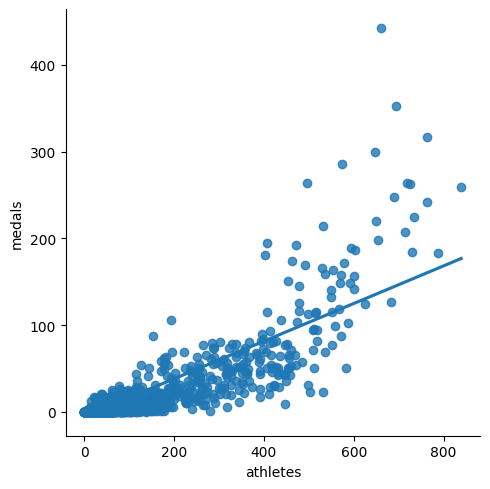

In [ ]:
import pandas as pd # type: ignore
teams = pd.read_csv('teams.csv')
teams = teams[["team", "country", "year", "athletes", "age", "medals", "prev_medals"]]
import seaborn as sns # type: ignore
sns.lmplot(x="athletes", y="medals", data=teams, ci=None)
teams[teams.isnull().any(axis=1)]
teams = teams.dropna()
teams
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predictors = ["athletes","prev_medals"]
target = "medals"
reg.fit(train[predictors], train["medals"])
predictions = reg.predict(test[predictors])
predictions
test["predictions"] = predictions
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"]=test["predictions"].round()
test
from sklearn.metrics import mean_absolute_error 
error = mean_absolute_error(test["medals"], test["predictions"])
error
teams.describe()["medals"]
test["errors"] = (test["medals"] - test["predictions"]).abs()
error_by_team = test.groupby("team")["errors"].mean()
medals_by_team = test.groupby("team")["medals"].mean()
error_ratio = error_by_team / medals_by_team
error_ratio[~pd.isnull(error_ratio)]
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio
error_ratio.sort_values()